In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('max_rows',100)

## Using Citibike data 2019 Jan as for initial tests

In [3]:
Jan_2019_df = pd.read_csv('Citibike_data_2019_2021/201901.csv')
Jan_2019_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1


In [4]:
Jan_2019_df.shape

(967287, 15)

In [5]:
Jan_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967287 entries, 0 to 967286
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             967287 non-null  int64  
 1   starttime                967287 non-null  object 
 2   stoptime                 967287 non-null  object 
 3   start station id         967269 non-null  float64
 4   start station name       967269 non-null  object 
 5   start station latitude   967287 non-null  float64
 6   start station longitude  967287 non-null  float64
 7   end station id           967269 non-null  float64
 8   end station name         967269 non-null  object 
 9   end station latitude     967287 non-null  float64
 10  end station longitude    967287 non-null  float64
 11  bikeid                   967287 non-null  int64  
 12  usertype                 967287 non-null  object 
 13  birth year               967287 non-null  int64  
 14  gend

In [6]:
print("Count of Null values in Dataframe : \n{} ".format(Jan_2019_df.isna().sum()))

Count of Null values in Dataframe : 
tripduration                0
starttime                   0
stoptime                    0
start station id           18
start station name         18
start station latitude      0
start station longitude     0
end station id             18
end station name           18
end station latitude        0
end station longitude       0
bikeid                      0
usertype                    0
birth year                  0
gender                      0
dtype: int64 


### Dropping rows with NA

In [7]:
Jan_2019_df.dropna(inplace=True)
Jan_2019_df.reset_index(inplace=True)

In [8]:
print("Count of Null values in Dataframe : {}".format(Jan_2019_df.isna().sum().sum()))

Count of Null values in Dataframe : 0


### Convert 'starttime' and 'stoptime' to datetime

In [9]:
Jan_2019_df['starttime'] = pd.to_datetime(Jan_2019_df['starttime'])
Jan_2019_df['stoptime'] = pd.to_datetime(Jan_2019_df['stoptime'])

In [11]:
Jan_2019_df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1


<AxesSubplot:>

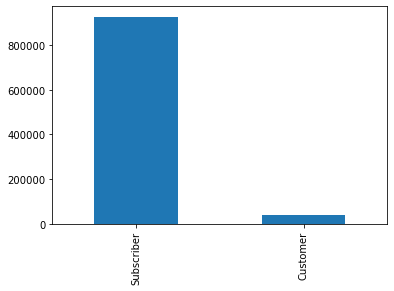

In [14]:
Jan_2019_df['usertype'].value_counts().plot(kind='bar')

<AxesSubplot:>

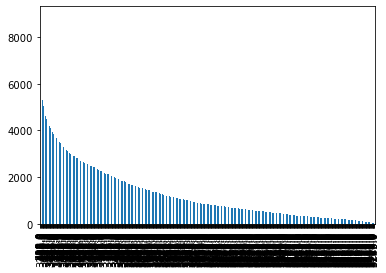

In [12]:
Jan_2019_df['start station id'].value_counts().plot(kind='bar')


<AxesSubplot:>

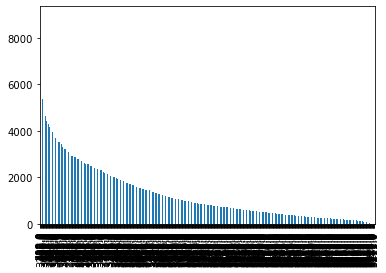

In [13]:
Jan_2019_df['end station id'].value_counts().plot(kind='bar')

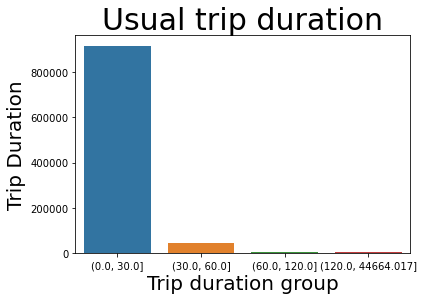

In [16]:
Jan_2019_df['tripduration'] = Jan_2019_df['tripduration']/60

#creating bins (0-30min, 30-60min, 60-120min, 120 and above)
max_limit = Jan_2019_df['tripduration'].max()
Jan_2019_df['tripduration_bins'] = pd.cut(Jan_2019_df['tripduration'], [0, 30, 60, 120, max_limit])

sns.barplot(x='tripduration_bins', y='tripduration', data=Jan_2019_df, estimator=np.size)
plt.title('Usual trip duration', fontsize=30)
plt.xlabel('Trip duration group', fontsize=20)
plt.ylabel('Trip Duration', fontsize=20)
plt.show()


<AxesSubplot:title={'center':'tripduration Outliers'}>

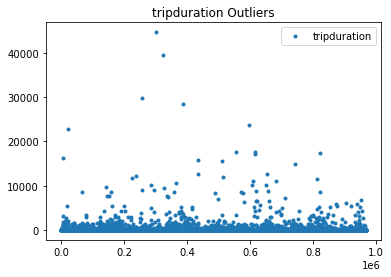

In [18]:
#Extracting Outliers

#Lower Quantile
tripduration_Q1 = Jan_2019_df['tripduration'].quantile(0.25)
#Upper Quantile
tripduration_Q3 = Jan_2019_df['tripduration'].quantile(0.75)

#Inter Quantile Range
tripduration_IQR = tripduration_Q3 - tripduration_Q1

tripduration_LB = tripduration_Q1 - 1.5*tripduration_IQR #Lower Bound
tripduration_UB = tripduration_Q3 + 1.5*tripduration_IQR #Upper Bound

tripduration_IQR_outliers = Jan_2019_df[(Jan_2019_df.tripduration <= tripduration_LB) | (Jan_2019_df.tripduration >= tripduration_UB)]


tripduration_IQR_outliers.tripduration.plot(style='.',title='tripduration Outliers', legend=True)

# OUTLIER DATA

In [19]:
tripduration_IQR_outliers

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_bins
3,3,45.316667,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1,"(30.0, 60.0]"
17,17,58.233333,2019-01-01 00:18:57.564,2019-01-01 01:17:11.570,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3164.0,Columbus Ave & W 72 St,40.777057,-73.978985,35785,Subscriber,1954,1,"(30.0, 60.0]"
37,37,58.183333,2019-01-01 00:27:17.128,2019-01-01 01:25:28.251,3574.0,Prospect Pl & Underhill Ave,40.676969,-73.965790,432.0,E 7 St & Avenue A,40.726218,-73.983799,32404,Subscriber,1994,1,"(30.0, 60.0]"
51,51,41.866667,2019-01-01 00:32:13.253,2019-01-01 01:14:05.714,3108.0,Nassau Ave & Russell St,40.725570,-73.944340,391.0,Clark St & Henry St,40.697601,-73.993446,35059,Subscriber,1985,2,"(30.0, 60.0]"
71,71,48.650000,2019-01-01 00:42:01.258,2019-01-01 01:30:40.556,3285.0,W 87 St & Amsterdam Ave,40.788390,-73.974700,3162.0,W 78 St & Broadway,40.783400,-73.980931,18737,Subscriber,1972,1,"(30.0, 60.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967210,967228,31.633333,2019-01-31 23:42:41.183,2019-02-01 00:14:19.970,3659.0,W 17 St & 9 Ave,40.742949,-74.004137,3288.0,E 88 St & 1 Ave,40.778301,-73.948813,34659,Subscriber,1988,1,"(30.0, 60.0]"
967211,967229,30.433333,2019-01-31 23:42:49.784,2019-02-01 00:13:16.390,369.0,Washington Pl & 6 Ave,40.732241,-74.000264,317.0,E 6 St & Avenue B,40.724537,-73.981854,33770,Subscriber,1987,1,"(30.0, 60.0]"
967235,967253,48.783333,2019-01-31 23:51:01.499,2019-02-01 00:39:48.874,3549.0,Grand Ave & Bergen St,40.678045,-73.962408,3526.0,31 St & 23 Ave,40.774788,-73.912555,34582,Subscriber,1988,2,"(30.0, 60.0]"
967253,967271,30.866667,2019-01-31 23:55:28.416,2019-02-01 00:26:20.843,438.0,St Marks Pl & 1 Ave,40.727791,-73.985649,3721.0,31 St & Newtown Ave,40.767549,-73.920933,35795,Subscriber,1989,1,"(30.0, 60.0]"


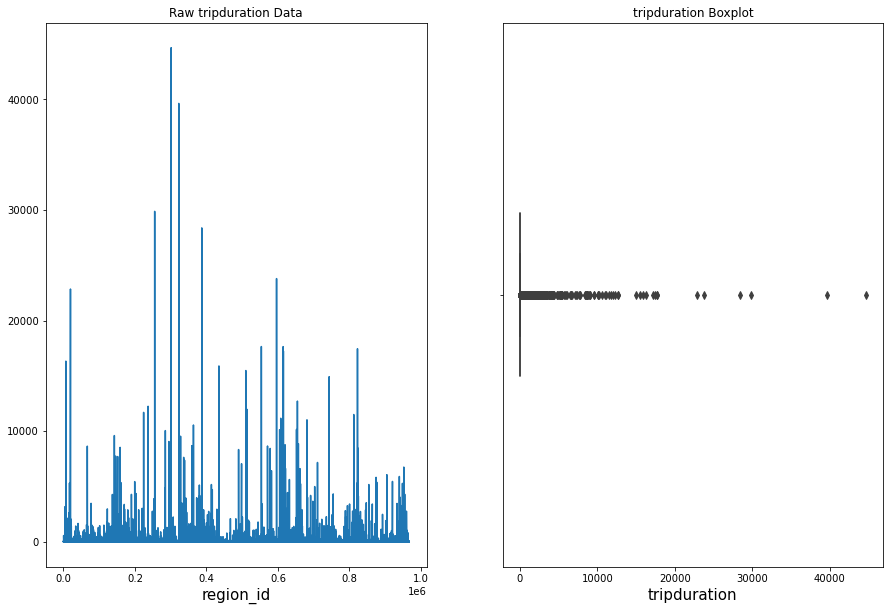

Error in callback <function flush_figures at 0x7ff52160bee0> (for post_execute):


KeyboardInterrupt: 

In [17]:
#TAKES FAR TOO LONG TO RUN

# fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# axes[0].plot(Jan_2019_df['tripduration'])
# axes[0].set_title('Raw tripduration Data')
# axes[0].set_xlabel("region_id", fontsize = 15)

# sns.boxplot(x = Jan_2019_df['tripduration'],width=0.3, ax=axes[1])
# axes[1].set_xlabel("tripduration", fontsize = 15)
# axes[1].set_title("tripduration Boxplot")

#sns.displot(Jan_2019_df['tripduration'],kde = True)